In [1]:
from dsc2024 import datasets
from dsc2024 import images

In [2]:
df = datasets.get_train_dataset(raw_data=True)

In [4]:
url = df.url_img_satelite[0]
url

'http://satelite.cptec.inpe.br/repositoriogoes/goes16/goes16_web/ams_ret_ch11_baixa/2022/06/S11635384_202206010100.jpg'

In [ ]:
img = images.download_image_and_cropit(url)
img

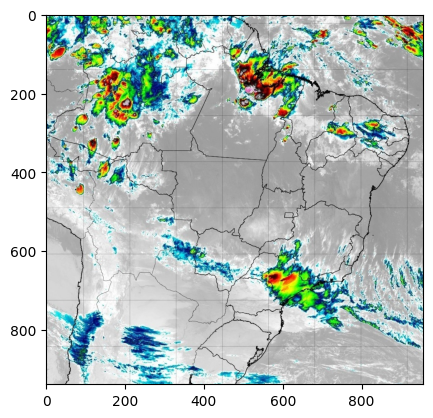

In [6]:
from matplotlib import pyplot as plt
plt.imshow(img)